Mounted at /content/gdrive
Input Image


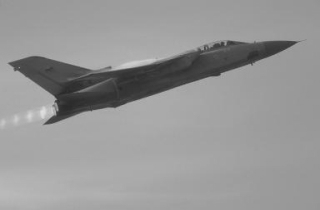

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt


img_color = '/content/gdrive/My Drive/ColabIP/Images/airplane.bmp' # 영상 불러오기
img_color = cv2.imread(img_color, 1)
gray_img = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
print("Input Image")
cv2_imshow(gray_img)


Binary Image


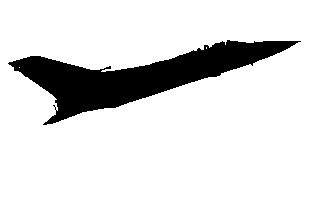

Morphology Dilation->noise removal


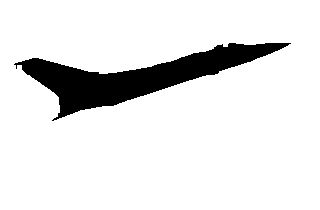

In [4]:
# threshold이용해 binary image로 변환
_, img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)
print("Binary Image")
cv2_imshow(img)
print("Morphology Dilation->noise removal")
kernal = np.ones((5,5), np.uint8)
mor_img = cv2.dilate(img, kernal)
cv2_imshow(mor_img)

In [5]:

contours, hierarchy = cv2.findContours(np.array(mor_img, dtype=np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]

# 회전(기울어짐) 고려하지 않는 바운딩 박스
x, y, w, h = cv2.boundingRect(cnt)

<ipython-input-6-354dff841a1a>:4: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [216, 154, 124],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [214, 151, 120]]], dtype=uint8)
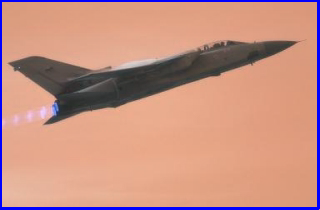

In [6]:
# 회전(기울어짐)고려하는 바운딩 박스
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img_color, [box], 0, (0, 0, 255), 2)


In [9]:
# 회전(기울어짐) 고려하는 타원
(x,y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
img_color = cv2.circle(img_color, center, radius, (0, 255, 0), 2)

# 회전(기울어짐) 고려하는 타원
ellipse = cv2.fitEllipse(cnt)
cv2.ellipse(img_color, ellipse, (255, 255, 0), 2)

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/shapedescr.cpp:360: error: (-201:Incorrect size of input array) There should be at least 5 points to fit the ellipse in function 'fitEllipseNoDirect'


In [ ]:
#